### First copy relevant models from axon

In [1]:
!rsync -avz --include="*/" axon:~/models/blt_v3/ ~/Desktop/blt_models_v3/

/etc/profile.d/lang.sh: line 19: warning: setlocale: LC_CTYPE: cannot change locale (UTF-8): No such file or directory
receiving file list ... done
classification/imagenet/blt_blt/run_loss_decay_gamma_0.2/
classification/imagenet/blt_blt/run_loss_decay_gamma_0.5/
classification/imagenet/blt_blt/run_loss_decay_gamma_0.8/
classification/imagenet/blt_blt/run_loss_weighted_gamma_0.0/
classification/imagenet/blt_blt/run_loss_weighted_gamma_0.2/
classification/imagenet/blt_blt/run_loss_weighted_gamma_1.0/

sent 60 bytes  received 1734 bytes  1196.00 bytes/sec
total size is 1187477536  speedup is 661916.13


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
from collections import OrderedDict

import torch

from cwk_analysis_helpers import *

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

Using device cpu


In [8]:
models_dir = Path("~/Desktop/blt_models_v3/classification/imagenet").expanduser()

list(models_dir.glob("*/*"))

[PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_bl_top2linear/run_loss_decay_gamma_0.5'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_bl/run_loss_decay_gamma_0.5'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_b3lt3/run_loss_decay_gamma_0.5'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_b_top2linear/run_loss_decay_gamma_0.5'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.8'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_0.2'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_1.0'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.5'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.2'),
 PosixPath(

In [9]:
list(models_dir.glob("blt_blt/run_loss_*"))

[PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.8'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_0.2'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_1.0'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.5'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.2'),
 PosixPath('/Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_0.0')]

# Load some features to use for analysis

[2024-08-14 12:47:49.139 WARNING]: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..5.0].


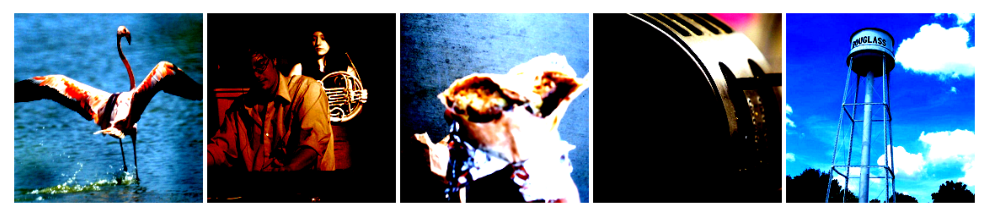

In [10]:
# https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
# imagenet_categories = [
#     96,   # toucan
#     397,  # pufferfish
#     402,  # acoustic guitar
#     422,  # barbell
#     866,  # tractor
# ]
imagenet_categories_and_labels = [
    (130, "flamingo"),
    (566, "French horn"),
    (965, "burrito"),
    (859, "toaster"),
    (900, "water tower"),
]
imagenet_category_labels = [c[1] for c in imagenet_categories_and_labels]
imagenet_categories = [c[0] for c in imagenet_categories_and_labels]
num_samples = 25

data_path = "/share/data/imagenet-pytorch" if torch.cuda.is_available() else "~/Documents/imagenet"

samples, sample_labels = get_sample_imagenet_validation_images(imagenet_categories, num_samples, data_path=data_path, plot_output=True)
samples.to(device)
sample_labels.to(device)

num_timesteps = 15
timesteps = list(range(num_timesteps))
recompute_features = False  # set to True if the samples/parameters above change

In [15]:
for model_dir in models_dir.glob("blt_blt/run_loss_*"):
# for model_dir in models_dir.glob("*/*"):
    if not (model_dir / "epoch_data.pt").exists():
        print(f"WARN: Skipping {model_dir} because no epoch data")
        continue
    
    print(f"Analyzing {model_dir}")
    analyzer = BLTModelAnalyzer(model_dir, device=device)
    analyzer.set_sample_data(samples, sample_labels, sample_label_names=OrderedDict(imagenet_categories_and_labels))
    analyzer.load_features(num_timesteps=num_timesteps, recompute=recompute_features)
    analyzer.run_analyses()
    print()
    # break

Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.8

Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_0.2

Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_1.0

Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.5

Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.2

Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_0.0



Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.8
Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_0.2
Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_1.0
Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.5
Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_decay_gamma_0.2
Analyzing /Users/chase/Desktop/blt_models_v3/classification/imagenet/blt_blt/run_loss_weighted_gamma_0.0


(0.0, 0.565248004347086)

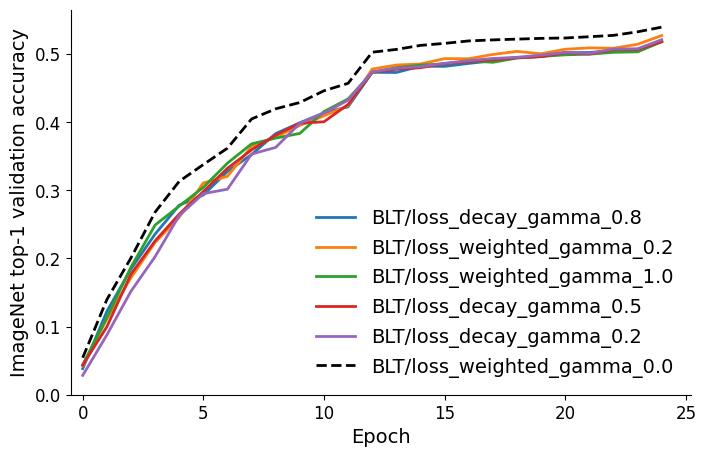

In [222]:
from cwk_analysis_helpers import BLTModelAnalyzer

fig, ax = plt.subplots(figsize=(8, 5))

for model_dir in models_dir.glob("blt_blt/run_loss_*"):
# for model_dir in models_dir.glob("*/*"):
    if not (model_dir / "epoch_data.pt").exists():
        print(f"WARN: Skipping {model_dir} because no epoch data")
        continue
    
    print(f"Analyzing {model_dir}")
    analyzer = BLTModelAnalyzer(model_dir, device=device)

    kwargs = dict(
        lw = 2,
        label = analyzer.name
    )
    if analyzer.metadata["args"]["loss_gamma"] == 0:
        kwargs["color"] = "black"
        kwargs["linestyle"] = "--"

    ax.plot([d["metrics"]["valid"]["accuracy"] for d in analyzer.epoch_data], **kwargs)

    # break

ax.legend(fontsize=14, frameon=False)
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("ImageNet top-1 validation accuracy", fontsize=14)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis="both", labelsize=12)
ax.set_xlim(-0.5, ax.get_xlim()[1])
ax.set_ylim(0, ax.get_ylim()[1])


# 

(0.0, 0.5525639899075031)

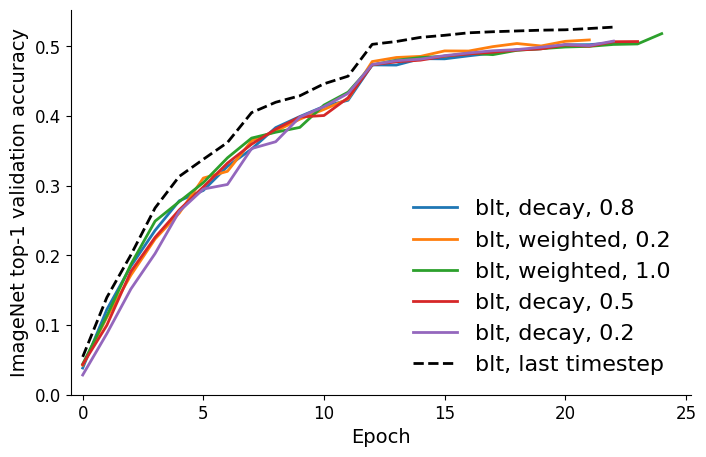

In [79]:
fig, ax = plt.subplots(figsize=(8, 5))

for model_dir in models_dir.glob("blt_blt/run_loss_*"):
# for model_dir in models_dir.glob("*/*"):
    if not (model_dir / "epoch_data.pt").exists():
        print(f"WARN: Skipping {model_dir} because no epoch data")
        continue
    model, epoch_data, metadata = load_model(model_dir, all_epoch_data=True, return_metadata=True)
    model.to(device)
    model_name = metadata["args"]["model"][4:]  # remove "blt_"
    loss_choice = metadata["args"]["loss_choice"]
    loss_gamma = metadata["args"]["loss_gamma"]
    model_human_label = f"{model_name}, {loss_choice}, {loss_gamma}"

    kwargs = dict(
        lw = 2
    )
    if loss_gamma == 0:
        kwargs["color"] = "black"
        kwargs["linestyle"] = "--"
        model_human_label = f"{model_name}, last timestep"
    kwargs["label"] = model_human_label

    ax.plot([d["metrics"]["valid"]["accuracy"] for d in epoch_data], **kwargs)

    # break

ax.legend(fontsize=16, frameon=False)
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("ImageNet top-1 validation accuracy", fontsize=14)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis="both", labelsize=12)
ax.set_xlim(-0.5, ax.get_xlim()[1])
ax.set_ylim(0, ax.get_ylim()[1])

### TODO: Compute validation accuracy at different timesteps

## Compute feature representations

[2024-08-13 16:23:56.208 WARNING]: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..5.0].


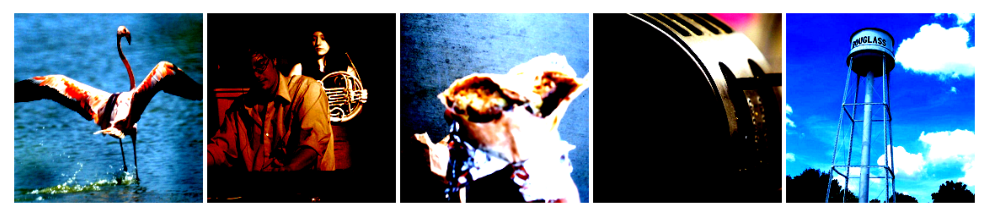

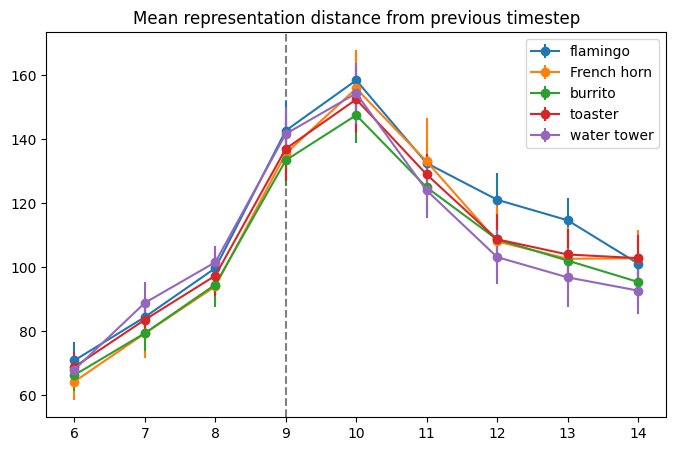

In [259]:
analyzer.plot_category_distances()

In [81]:
# Example feature extraction
def print_feature_shapes(features, last_time=False):
    for k, v in features.items():
        print(f"Layer {k}:")
        if v is not None:
            for t, vv in enumerate(v):
                if not last_time or t == len(v)-1:
                    print(f" - t={t}: {tuple(vv.shape) if vv is not None else None}")
        else:
            print(" - None")

layer_features, outputs = extract_layer_features(model, torch.randn(1, 3, 224, 224), layer_indices=[5], num_timesteps=10)
print_feature_shapes(layer_features)

Layer 5:
 - t=0: None
 - t=1: None
 - t=2: None
 - t=3: None
 - t=4: None
 - t=5: (1, 512, 7, 7)
 - t=6: (1, 512, 7, 7)
 - t=7: (1, 512, 7, 7)
 - t=8: (1, 512, 7, 7)
 - t=9: (1, 512, 7, 7)
